# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pydot
import seaborn as sns
from keras import models
from keras.layers import Dense, Conv1D, Attention, Flatten, Dropout, LSTM
from keras.models import Sequential,Model
from keras import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.metrics import roc_curve, auc
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv('Breastcancer.csv')

In [3]:
df.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [4]:
B,M = df['diagnosis'].value_counts()
print(f"Benign = {B}, Malignant = {M}")

Benign = 357, Malignant = 212


[Text(0, 0, 'Malignant'), Text(1, 0, 'Benign')]

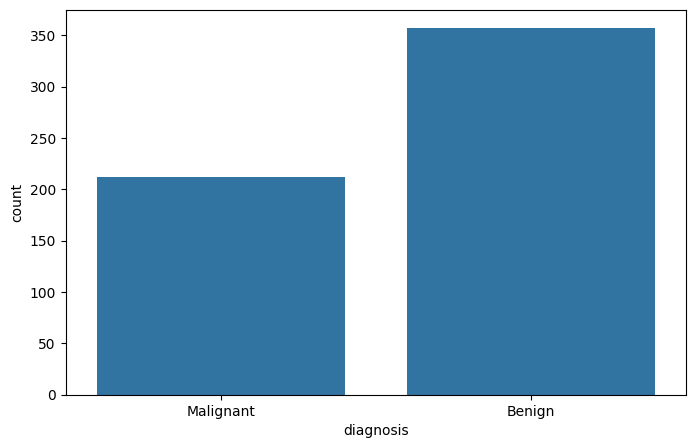

In [5]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x="diagnosis", data=df)
plt.subplot().set_xticklabels(["Malignant", "Benign"])

# Data Preprocessing

In [6]:
y=df.diagnosis
X = df.drop(['diagnosis'], axis=1)

In [7]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [8]:
df.drop(columns='id', inplace=True)

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
diagnosis_y = LabelEncoder()
df['diagnosis'] = diagnosis_y.fit_transform(df['diagnosis'])

# Train Test Split

In [11]:
data = load_breast_cancer()
X = data.data
y = data.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Creation

In [15]:
model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model and obtain the history object
history = History()
model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), callbacks=[history])

Epoch 1/150


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7880 - loss: 0.5628 - val_accuracy: 0.9649 - val_loss: 0.3049
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9251 - loss: 0.2842 - val_accuracy: 0.9649 - val_loss: 0.1607
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9351 - loss: 0.1658 - val_accuracy: 0.9737 - val_loss: 0.1051
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9764 - loss: 0.0978 - val_accuracy: 0.9825 - val_loss: 0.0807
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9660 - loss: 0.1169 - val_accuracy: 0.9737 - val_loss: 0.0727
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0652 - val_accuracy: 0.9825 - val_loss: 0.0628
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9824 - loss: 0.0618 - val_accuracy: 0.9912 - val_loss: 0.0582
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9906 - loss: 0.0551 - val_accuracy: 0.9912 - val_loss: 0.

In [17]:
#Calculate binary predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1,)
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [18]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9736842105263158


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.1837 


In [20]:
print(f'Loss in the ANN Model design : {loss:.4f}')
print(f'Accuracy in the ANN Model design : {accuracy*100:.4f}')

Loss in the ANN Model design : 0.1276
Accuracy in the ANN Model design : 97.3684


# Graphs

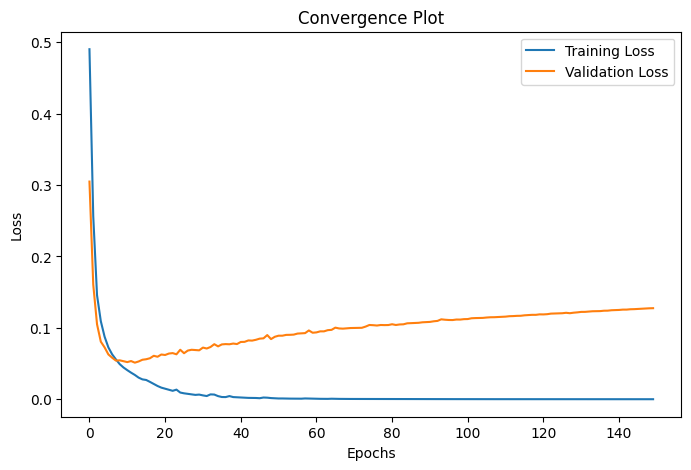

In [21]:
history = globals()['history']
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Convergence Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

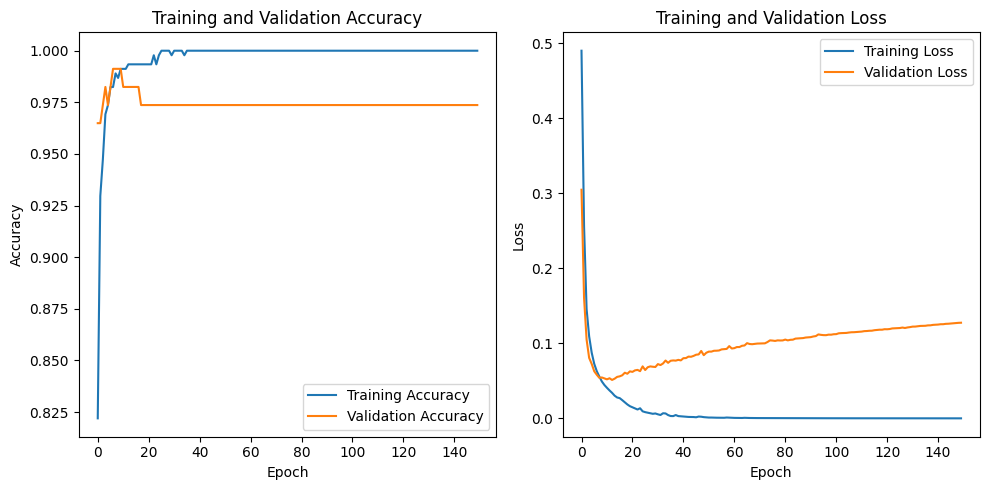

In [22]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix

In [23]:
cm = confusion_matrix(y_test,y_pred)

In [24]:
cm

array([[41,  2],
       [ 1, 70]], dtype=int64)

Text(0.5, 19.722222222222214, 'Predicted Values')

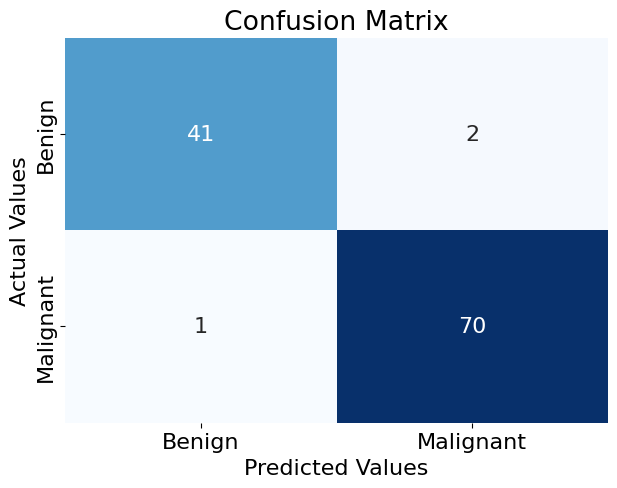

In [25]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# ROC Curve

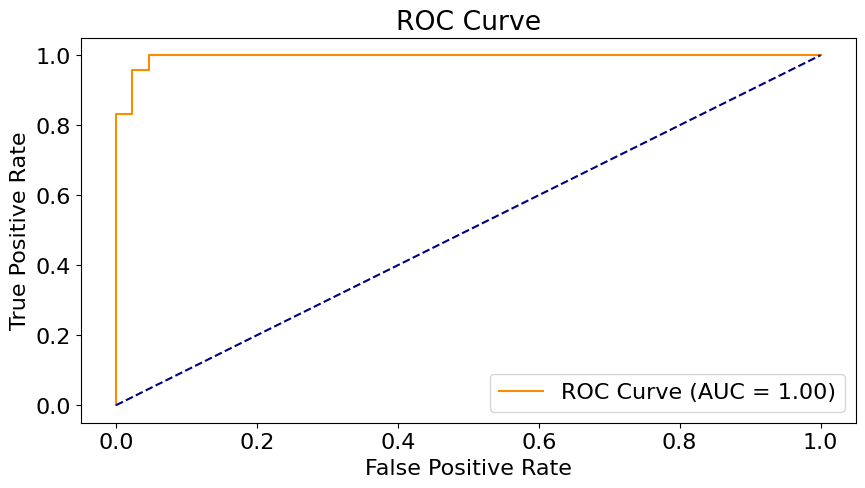

In [26]:
# Compute ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Actual vs Predicted Values for the testing data

In [27]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions
y_pred_binary = y_pred.astype(int)  # Convert boolean values to integers (1 for True, 0 for False)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred_binary.flatten()})

# Print or display the DataFrame
print(results_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     actual  predicted
0         1          1
1         0          0
2         0          0
3         1          1
4         1          1
..      ...        ...
109       1          1
110       0          0
111       1          1
112       1          1
113       0          0

[114 rows x 2 columns]


# Checking the output for input data

In [31]:
input_data=(13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7889,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)
#input_data=(17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#input_data=(11.75,20.18,76.1,419.8,0.1089,0.1141,0.06843,0.03738,0.1993,0.06453,0.5018,1.693,3.926,38.34,0.009433,0.02405,0.04167,0.01152,0.03397,0.005061,13.32,26.21,88.91,543.9,0.1358,0.1892,0.1956,0.07909,0.3168,0.07987)

## changing input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

## reshape the numpy array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

## standarize the data
std_data= scaler.transform(input_data_reshaped)
#print(std_data)
prediction_proba = model.predict(std_data)
print(prediction_proba)
pred = (prediction_proba > 0.5).astype(int).reshape(-1,1)
print('Prediction probabilities:', pred)

# Convert probabilities to class labels based on threshold (0.5)
if prediction_proba >= 0.5:
    print('Benign')
else:
    print('Malignant')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.99999756]]
Prediction probabilities: [[1]]
Benign


# Saving the model and Scaler files

In [29]:
# Save the model
model.save('BreastcancerpredicitonDL.h5')

import pickle
# Save the scaler
with open('Scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)
